In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline                        
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
import sys
print(sys.version)

1.18.5
1.1.4
0.10.0
3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]


# Reading data 

In [3]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
col_name = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
124,125,6.7,3.3,5.7,2.1,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
65,66,6.7,3.1,4.4,1.4,Iris-versicolor


# Iris Data from Seaborn

In [9]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [13]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [14]:
df.cov()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


In [15]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [16]:
teju = df.cov()
teju

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


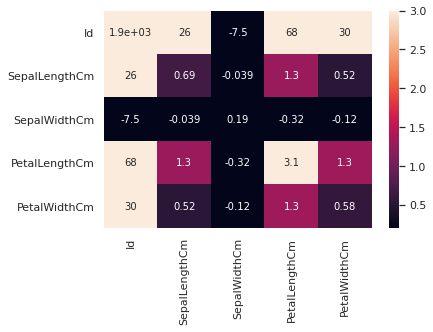

In [17]:
#heatmap
sns.heatmap(teju,annot=True,vmin=.2,vmax=3)

In [18]:
#print 2nd column of third and fourth row 
df.iloc[2:4, 1:2]

,SepalLengthCm
2,4.7
3,4.6


In [19]:
#skewness
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [20]:
#Checking for Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
df.notnull().sum()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

# Data Visualisation

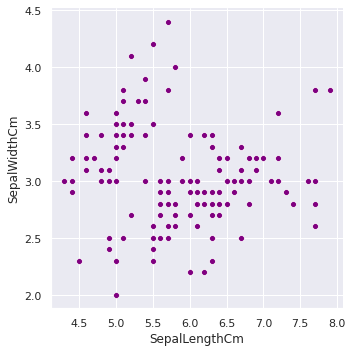

In [22]:
sns.relplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm", color = 'purple')

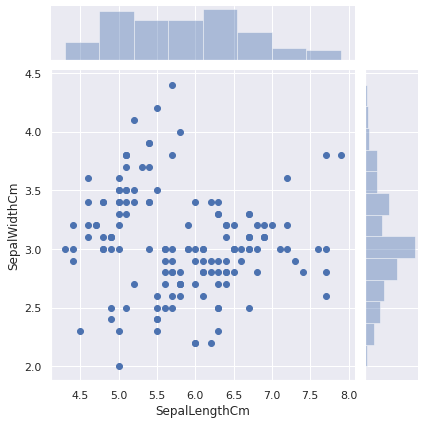

In [23]:
sns.jointplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm")

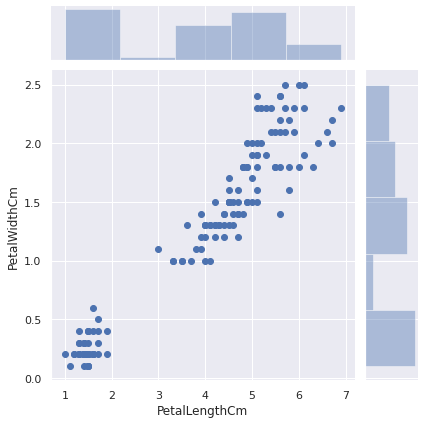

In [24]:
sns.jointplot(data = df, x = "PetalLengthCm", y = "PetalWidthCm")

In [25]:
#standard deviation
df.std()

Id               43.445368
SepalLengthCm     0.828066
SepalWidthCm      0.433594
PetalLengthCm     1.764420
PetalWidthCm      0.763161
dtype: float64

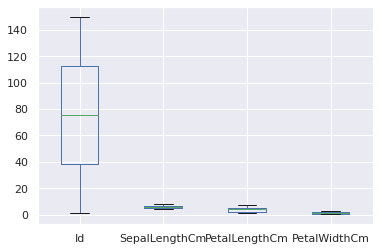

In [26]:
#Boxplot
df.plot.box(x='SepalWidthCm')
plt.show()

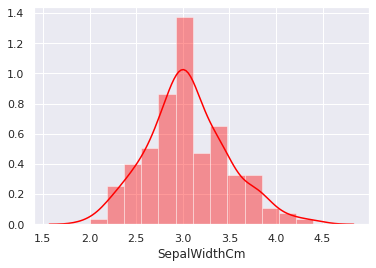

In [27]:
sns.distplot(df.SepalWidthCm, color = 'red')

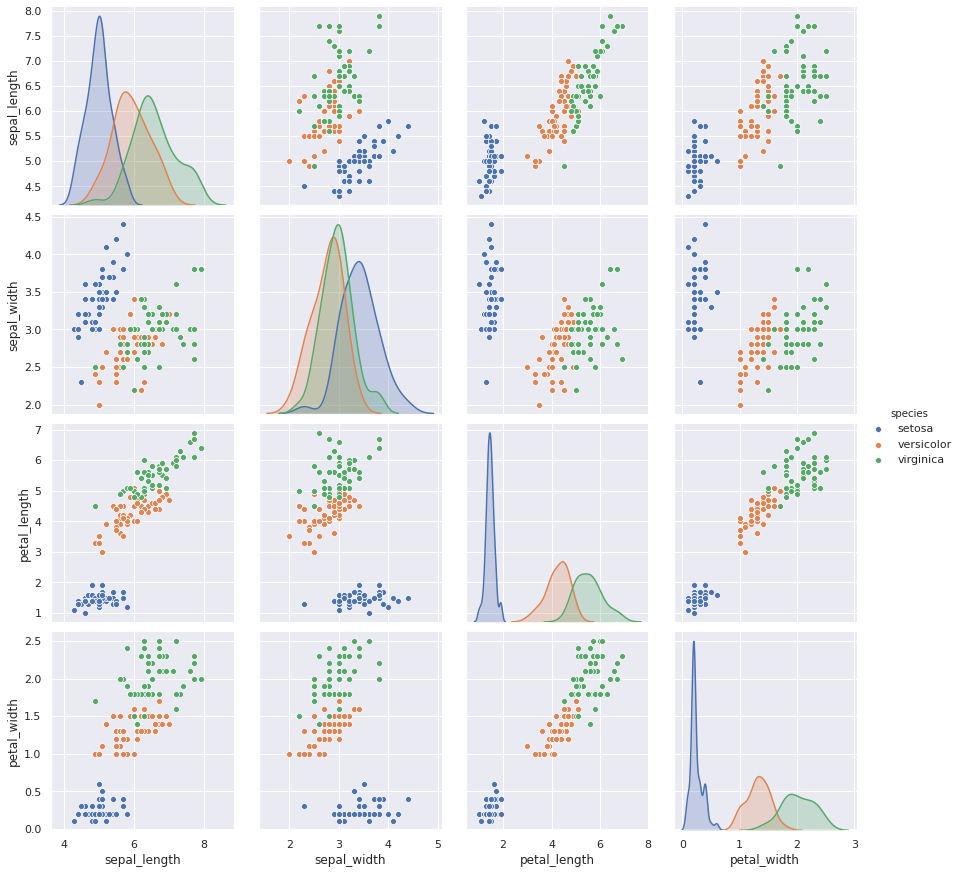

In [28]:
sns.pairplot(iris, hue='species', height=3, aspect=1);

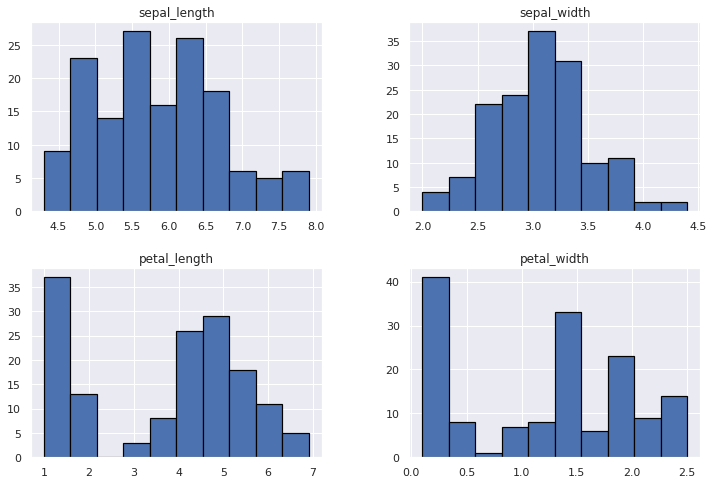

In [29]:
iris.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

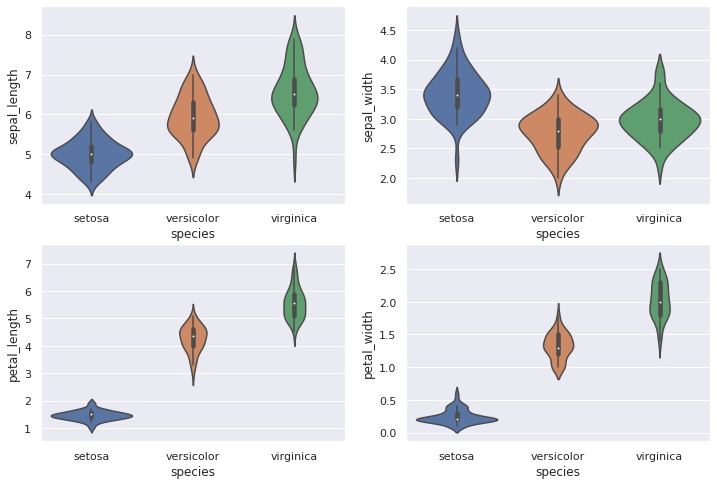

In [30]:
plt.figure(figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=iris);

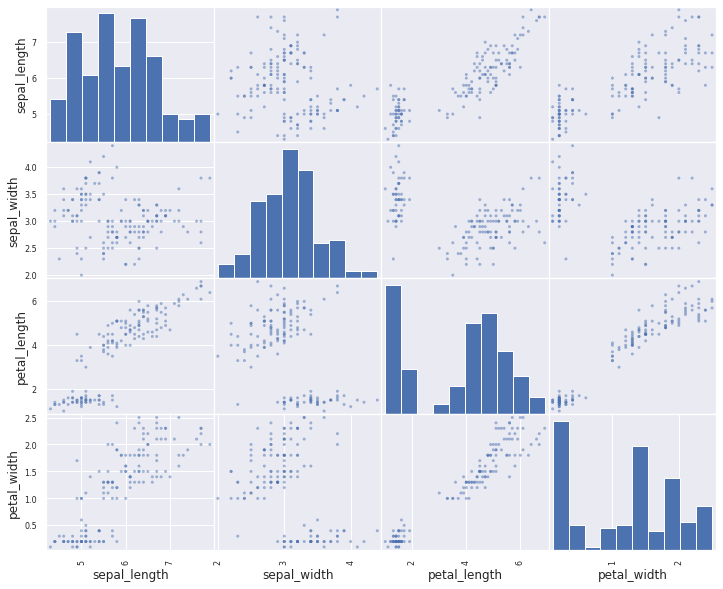

In [31]:
pd.plotting.scatter_matrix(iris, figsize=(12,10))
plt.show()

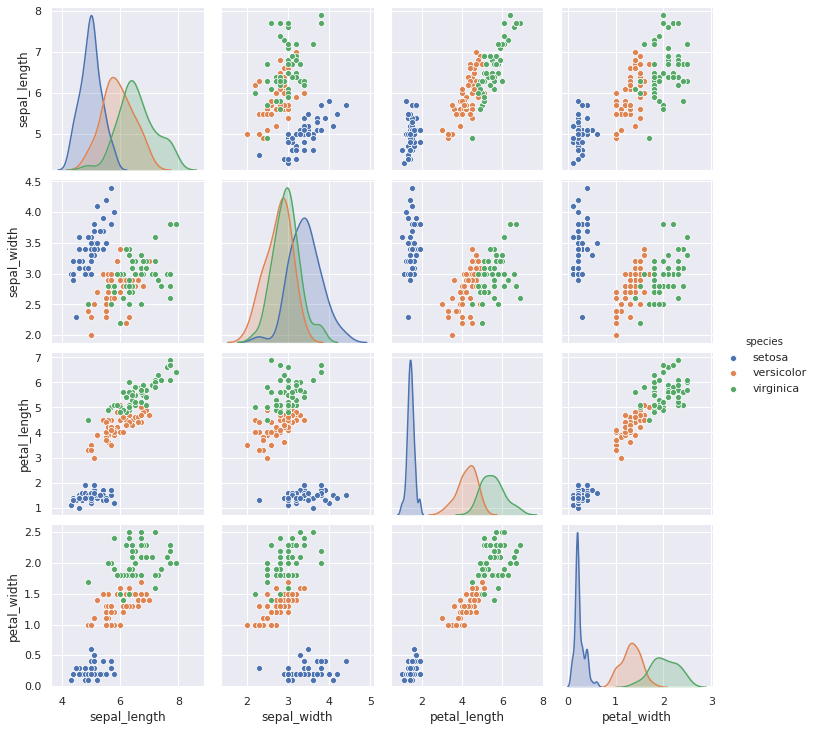

In [32]:
sns.pairplot(iris, hue="species", diag_kind="kde");

# Supervised Learning: Simple Linear Regression

In [33]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(100)

In [34]:
y = 3 * x + np.random.randn(100)

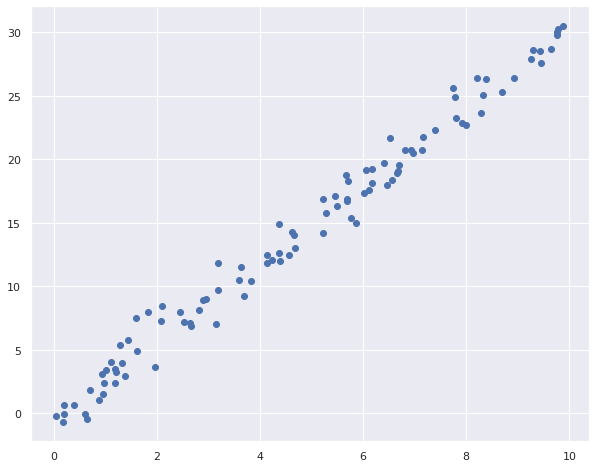

In [35]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y);

# Step 1. Choose a class of model

In [36]:
from sklearn.linear_model import LinearRegression

# Step 2. Choose model hyperparameters


In [37]:
model = LinearRegression(fit_intercept=True)

In [38]:
model

LinearRegression()

# Step 3. Arrage data into features matrix and target array

In [39]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

# Step 4. Fit model to data

In [40]:
model.fit(X, y)

LinearRegression()

In [41]:
model.coef_

array([3.04703599])

In [42]:
model.intercept_

-0.3240947178385145

# Step 5. Apply trained model to new data

In [43]:
x_fit = np.linspace(-1, 11)

In [44]:
X_fit = x_fit.reshape(-1,1)

In [45]:
y_fit = model.predict(X_fit)

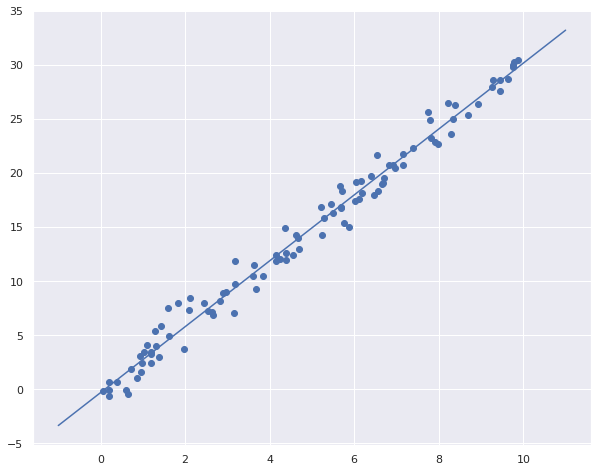

In [46]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x_fit, y_fit);

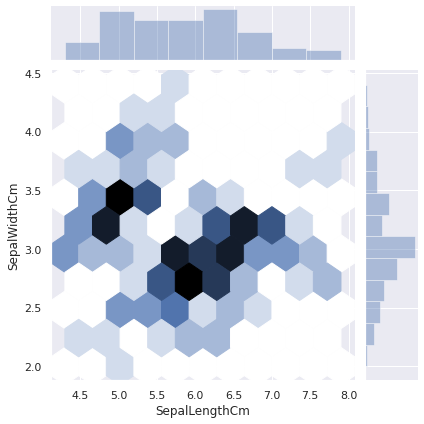

In [47]:
sns.jointplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],kind='hex')

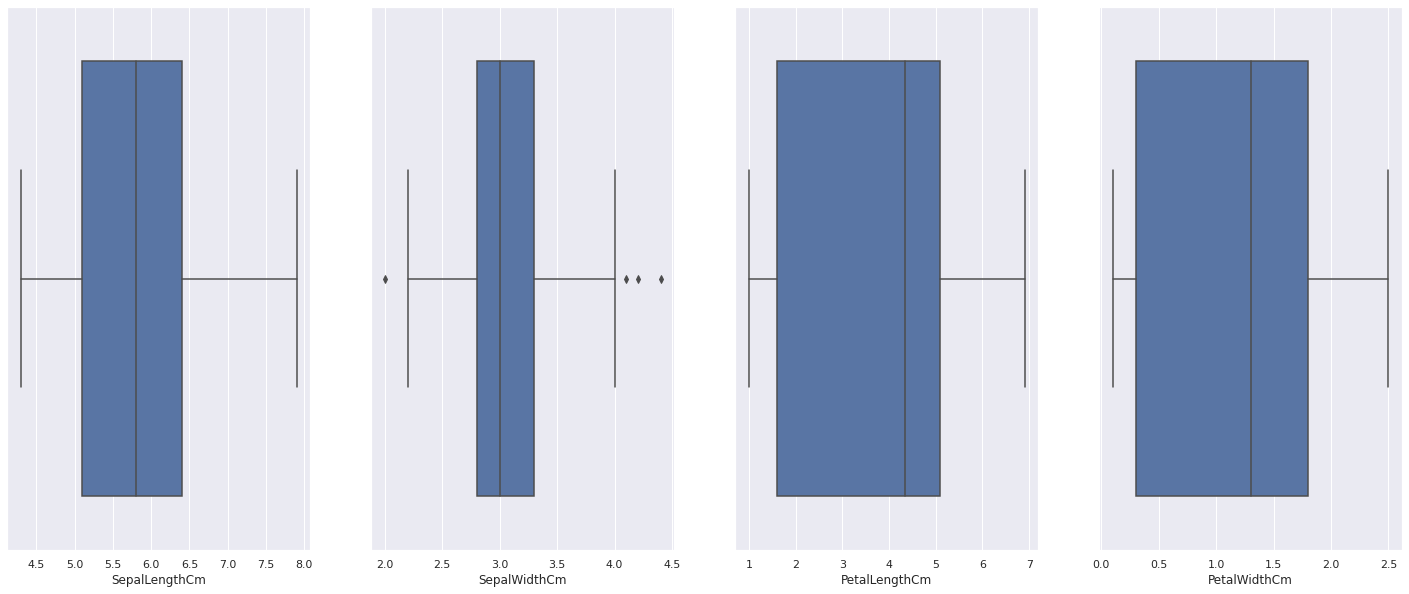

In [48]:
sns.set(rc={'figure.figsize':(25,10)})
fig, axs = plt.subplots(ncols=4)
sns.boxplot(x=df['SepalLengthCm'], data=df, ax=axs[0])
sns.boxplot(x=df['SepalWidthCm'], data=df, ax=axs[1])
sns.boxplot(x=df['PetalLengthCm'], data=df, ax=axs[2])
sns.boxplot(x=df['PetalWidthCm'], data=df, ax=axs[3])

# THANK YOU